In [1]:
!nvidia-smi

Sat Oct  1 13:23:13 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!git clone https://github.com/yalcinyusuf/Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 971, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 971 (delta 6), reused 0 (delta 0), pack-reused 955
Receiving objects: 100% (971/971), 144.65 MiB | 39.31 MiB/s, done.
Resolving deltas: 100% (564/564), done.


In [3]:
%pwd

'/content'

In [4]:
%cd Mask_RCNN/

/content/Mask_RCNN


In [5]:
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.3 MB 55 kB/s 
     |████████████████████████████████| 276 kB 68.0 MB/s 
     |████████████████████████████████| 2.9 MB 45.2 MB/s 
     |████████████████████████████████| 3.1 MB 54.1 MB/s 
     |████████████████████████████████| 50 kB 7.4 MB/s 
     |████████████████████████████████| 488 kB 59.1 MB/s 
     |████████████████████████████████| 1.6 MB 52.2 MB/s 
     |████████████████████████████████| 120 kB 70.1 MB/s 
     |████████████████████████████████| 298 kB 59.2 MB/s 
     |████████████████████████████████| 154 kB 73.3 MB/s 
     |████████████████████████████████| 82 kB 656 kB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling t

In [6]:
from training import *

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

... done downloading pretrained model!


In [7]:
dataset = "fveriseti.zip"
annotations = "forklift.json"

In [8]:
extract_images(os.path.join("fveriseti.zip"),"/content/Mask_RCNN/fveriseti")

Extracted: 60 images


In [9]:
train = load_image_dataset(os.path.join("forklift.json"),"/content/Mask_RCNN/fveriseti","train")
validation = load_image_dataset(os.path.join("forklift.json"),"/content/Mask_RCNN/fveriseti","validation")

print("Train Images: ", len(train.image_ids))
print("Validation Images: ", len(validation.image_ids))

Annotation json path:  forklift.json
Annotation json path:  forklift.json
Train Images:  54
Validation Images:  6


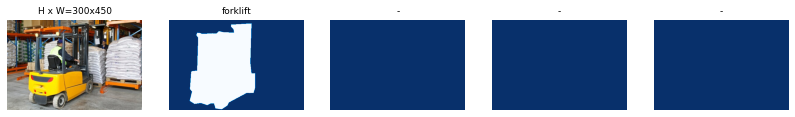

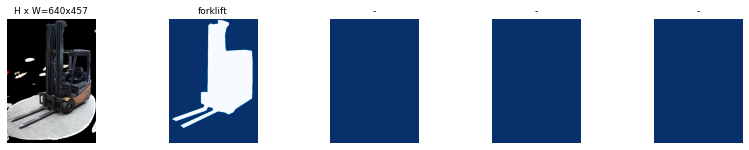

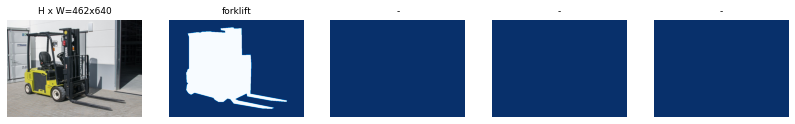

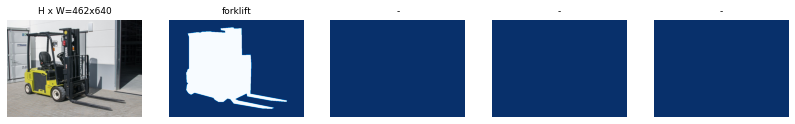

In [10]:
display_image_samples(train)

In [11]:
config = CustomConfig()
model = load_training_model(config)






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


/content/Mask_RCNN/mask_rcnn_coco.h5


In [12]:
train_head(model, train, validation, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Mask_RCNN/logs/forklift20221001T1333/mask_rcnn_forklift_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mas


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




Epoch 1/5
15/15 [==============================] - 1805s - loss: 1.5031 - rpn_class_loss: 0.0181 - rpn_bbox_loss: 0.3303 - mrcnn_class_loss: 0.0935 - mrcnn_bbox_loss: 0.7373 - mrcnn_mask_loss: 0.3240 - val_loss: 0.9037 - val_rpn_class_loss: 0.0038 - val_rpn_bbox_loss: 0.1736 - val_mrcnn_class_loss: 0.0147 - val_mrcnn_bbox_loss: 0.5119 - val_mrcnn_mask_loss: 0.1996
Epoch 2/5
15/15 [==============================] - 1642s - loss: 0.8672 - rpn_class_loss: 0.0152 - rpn_bbox_loss: 0.2430 - mrcnn_class_loss: 0.0296 - mrcnn_bbox_loss: 0.3496 - mrcnn_mask_loss: 0.2298 - val_loss: 0.7500 - val_rpn_class_loss: 0.0030 - val_rpn_bbox_loss: 0.1321 - val_mrcnn_class_loss: 0.0127 - val_mrcnn_bbox_loss: 0.4056 - val_mrcnn_mask_loss: 0.1965
Epoch 3/5
15/15 [==============================] - 1594s - loss: 0.7608 - rpn_class_loss: 0.0103 - rpn_bbox_loss: 0.2118 - mrcnn_class_loss: 0.0333 - mrcnn_bbox_loss: 0.2823 - mrcnn_mask_loss: 0.2231 - val_loss: 0.6793 - val_rpn_class_loss: 0.0022 - val_rpn_bbox_los

# Detection

In [162]:
inference_config = InferenceConfig()
#inference_config.display()

In [163]:
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

In [164]:
test_model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

In [165]:
model_path = test_model.find_last()

In [166]:
print("Loading weights from ", model_path)
test_model.load_weights(model_path, by_name=True)

Loading weights from  /content/Mask_RCNN/logs/forklift20221001T1333/mask_rcnn_forklift_0004.h5
Re-starting from epoch 4


original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


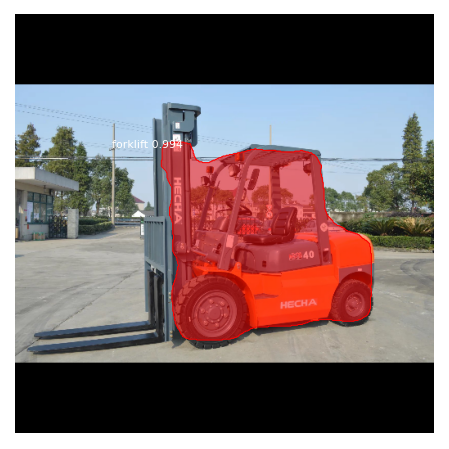

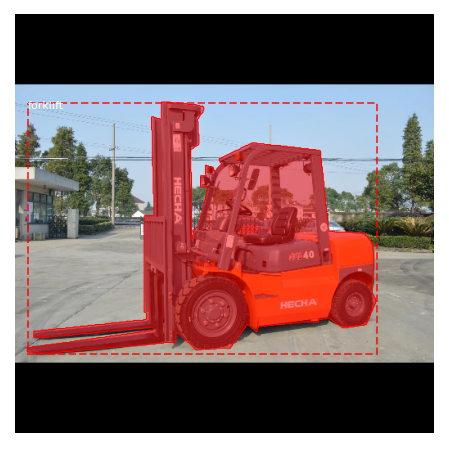

In [167]:
test_random_image(test_model, validation, inference_config)